In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import cv2


# Load the saved model
model = load_model("model_resnet_final.h5")
# model = load_model("resnet_perfect/model_resnet.h5")

1/1 [==============================] - 0s 109ms/step

                  80 किमी/घंटा की स्पीड सीमा


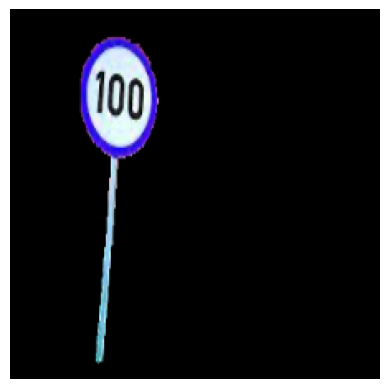

In [26]:
from gtts import gTTS
from pydub import AudioSegment
from pydub.playback import play
import matplotlib.pyplot as plt
import IPython.display as ipd
input_shape = (224, 224)

# Define the mapping of predicted classes to class labels and their respective language codes
class_labels = {
    0: {
        'en': 'Speed limit (20km/h)',
        'hi': '20 किमी/घंटा की स्पीड सीमा',
        'ta': '20 கிமீ/மணி வேக வரம்',
        'te': '20 కిమీ/గంట గతివరణ',
        'ml': '20 കിമൈ/മണി വര്',
        'ur': '20 کلومیٹر فی گھنٹہ کی رفتار پر پابندی',
        'gu': '20 કિમી/કલાક કી ગતિ મર્યાદા',
        'bn': '20 কিমি/ঘণ্টার গতি সীমা',
        'kn': '20 ಕಿಮೀ/ಗಂಟೆಯ ಗತಿಸೀಮೆ',
        'ms': 'Had Laju (20km/j)',
    },
    1: {
        'en': 'Speed limit (30km/h)',
        'hi': '30 किमी/घंटा की स्पीड सीमा',
        'ta': '30 கிமீ/மணி வேக வரம்',
        'te': '30 కిమీ/గంట గతివరణ',
        'ml': '30 കിമൈ/മണി വര്',
        'ur': '30 کلومیٹر فی گھنٹہ کی رفتار پر پابندی',
        'gu': '30 કિમી/કलાક કી ગતિ મર્યાદા',
        'bn': '30 কিমি/ঘণ্টার গতি সীমা',
        'kn': '30 ಕಿಮೀ/ಗಂಟೆಯ ಗತಿಸೀಮೆ',
        'ms': 'Had Laju (30km/j)',
    },
    2: {
        'en': 'Speed limit (50km/h)',
        'hi': '50 किमी/घंटा की स्पीड सीमा',
        'ta': '50 கிமீ/மணி வேக வரம்',
        'te': '50 కిమీ/గంట గతివరణ',
        'ml': '50 കിമൈ/മണി വര്',
        'ur': '50 کلومیٹر فی گھنٹہ کی رفتار پر پابندی',
        'gu': '50 કિમી/કलાક કી ગતિ મર્યાદા',
        'bn': '50 কিমি/ঘণ্টার গতি সীমা',
        'kn': '50 ಕಿಮೀ/ಗಂಟೆಯ ಗತಿಸೀಮೆ',
        'ms': 'Had Laju (50km/j)',
    },
    3: {
        'en': 'Speed limit (60km/h)',
        'hi': '60 किमी/घंटा की स्पीड सीमा',
        'ta': '60 கிமீ/மணி வேக வரம்',
        'te': '60 కిమీ/గంట గతివరణ',
        'ml': '60 കിമൈ/മണി വര്',
        'ur': '60 کلومیٹر فی گھنٹہ کی رفتار پر پابندی',
        'gu': '60 કિમી/કलાક કી ગતિ મर્યાદા',
        'bn': '60 কিমি/ঘণ্টার গতি সীমা',
        'kn': '60 ಕಿಮೀ/ಗಂಟೆಯ ಗತಿಸೀಮೆ',
        'ms': 'Had Laju (60km/j)',
    },
    4: {
        'en': 'Speed limit (70km/h)',
        'hi': '70 किमी/घंटा की स्पीड सीमा',
        'ta': '70 கிமீ/மணி வேக வரம்',
        'te': '70 కిమీ/గంట గతివరణ',
        'ml': '70 കിമൈ/മണി വര്',
        'ur': '70 کلومیٹر فی گھنٹہ کی رفتار پر پابندی',
        'gu': '70 કિમી/કलાક કી ગતિ મર્યાદા',
        'bn': '70 কিমি/ঘণ্টার গতি সীমা',
        'kn': '70 ಕಿಮೀ/ಗಂಟೆಯ ಗತಿಸೀಮೆ',
        'ms': 'Had Laju (70km/j)',
    },
    5: {
        'en': 'Speed limit (80km/h)',
        'hi': '80 किमी/घंटा की स्पीड सीमा',
        'ta': '80 கிமீ/மணி வேக வரம்',
        'te': '80 కిమీ/గంట గతివరణ',
        'ml': '80 കിമൈ/മണി വര്',
        'ur': '80 کلومیٹر فی گھنٹہ کی رفتار پر پابندی',
        'gu': '80 કિમી/કलાક કી ગતિ મર્યાદા',
        'bn': '80 কিমি/ঘণ্টার গতি সীমা',
        'kn': '80 ಕಿಮೀ/ಗಂಟೆಯ ಗತಿಸೀಮೆ',
        'ms': 'Had Laju (80km/j)',
    },
    6: {
        'en': 'End of speed limit (80km/h)',
        'hi': '80 किमी/घंटा की स्पीड सीमा का समापन',
        'ta': '80 கிமீ/மணி வேக வரம் முடக்கம்',
        'te': '80 కిమీ/గంట గతివరణ అంతం',
        'ml': '80 കിമൈ/മണി വര് അവസാനം',
        'ur': '80 کلومیٹر فی گھنٹہ کی رفتار پر پابندی کا اختتام',
        'gu': '80 કિમી/કલાક કી ગતિ મર્યાદાનું અંત',
        'bn': '80 কিমি/ঘণ্টার গতি সীমা শেষ',
        'kn': '80 ಕಿಮೀ/ಗಂಟೆಯ ಗತಿಸೀಮೆಯ ಕೊನೆ',
        'ms': 'Had Laju (80km/j) Tamat',
    },
    7: {
        'en': 'Speed limit (100km/h)',
        'hi': '100 किमी/घंटा की स्पीड सीमा',
        'ta': '100 கிமீ/மணி வேக வரம்',
        'te': '100 కిమీ/గంట గతివరణ',
        'ml': '100 കിമൈ/മണി വര്',
        'ur': '100 کلومیٹر فی گھنٹہ کی رفتار پر پابندی',
        'gu': '100 કિમી/કલાક કી ગતિ મર્યાદા',
        'bn': '100 কিমি/ঘণ্টার গতি সীমা',
        'kn': '100 ಕಿಮೀ/ಗಂಟೆಯ ಗತಿಸೀಮೆ',
        'ms': 'Had Laju (100km/j)',
    },
    8: {
        'en': 'Speed limit (120km/h)',
        'hi': '120 किमी/घंटा की स्पीड सीमा',
        'ta': '120 கிமீ/மணி வேக வரம்',
        'te': '120 కిమీ/గంట గతివరణ',
        'ml': '120 കിമൈ/മണി വര്',
        'ur': '120 کلومیٹر فی گھنٹہ کی رفتار پر پابندی',
        'gu': '120 કિમી/કલાક કી ગતિ મર્યાદા',
        'bn': '120 কিমি/ঘণ্টার গতি সীমা',
        'kn': '120 ಕಿಮೀ/ಗಂಟೆಯ ಗತಿಸೀಮೆ',
        'ms': 'Had Laju (120km/j)',
    } 
}



# Replace with the index of the image you want to use from the test set
# test_image_index = 10  # Adjust this index as needed

# Load the image from the test set
# image_to_process = X_test[test_image_index]

# img_path = 'test_images/120.jpeg'
img_path = 'test_images/100_nobg.png'
img = cv2.imread(img_path)
image_to_process = np.array(cv2.resize(img, input_shape))

# Reshape the image to match the model's input shape
image_to_process = np.expand_dims(image_to_process, axis=0)

# Make predictions
predictions = model.predict(image_to_process)
predicted_class_index = np.argmax(predictions)

# Get the predicted class label and language code based on user preference
preferred_language = input("Enter your preferred language code (e.g., 'en' for English, 'hi' for Hindi): ").strip()
predicted_class_label = class_labels.get(predicted_class_index, {}).get(preferred_language, 'Unknown')
print()
print("                 ",predicted_class_label)

# Display the image using matplotlib
plt.imshow(image_to_process[0].astype(np.uint8))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Generate audio alert for the predicted sign
message = f"{predicted_class_label}"
tts = gTTS(text=message, lang=preferred_language)

# Save the audio to a temporary file
alert_filename = "predicted_audio.mp3"
tts.save(alert_filename)

# Load the audio file
audio = AudioSegment.from_mp3(alert_filename)
# Play the audio
ipd.Audio(alert_filename, autoplay=True)